C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


ValueError: shapes (219,1) and (3,) not aligned: 1 (dim 1) != 3 (dim 0)

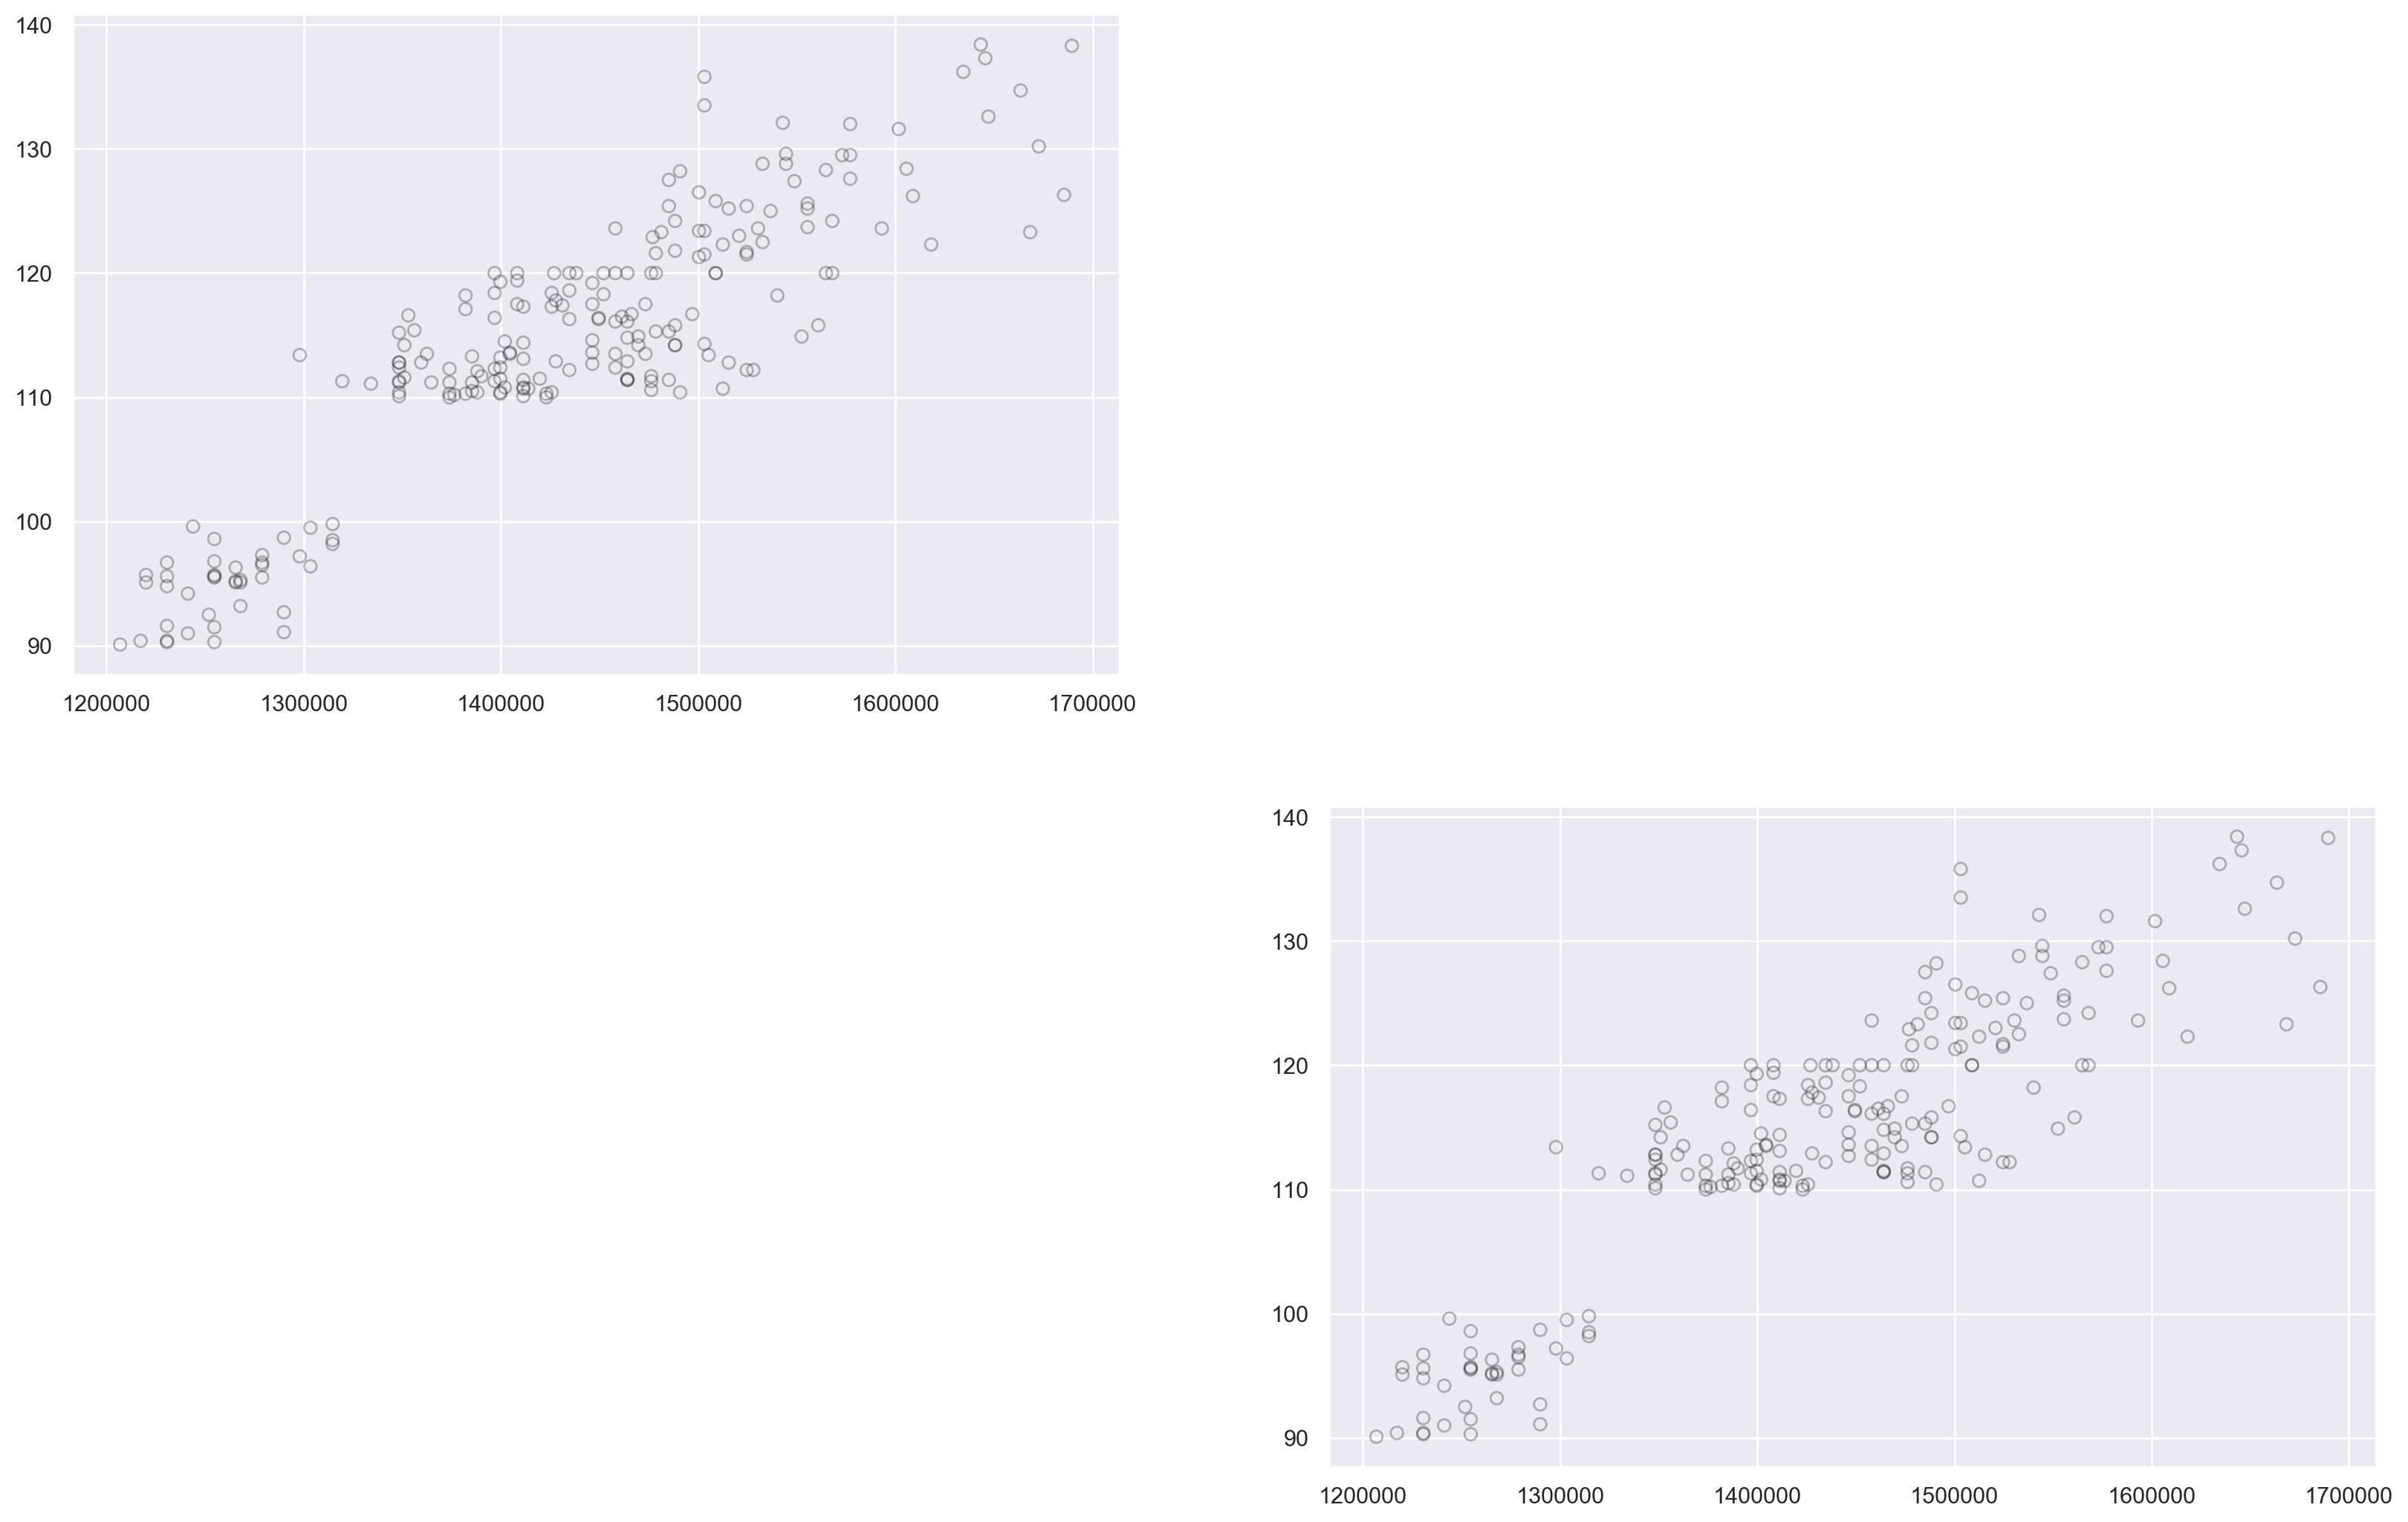

In [88]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model 
from sklearn.preprocessing import PolynomialFeatures 

df = pd.read_csv('data/台系母-.csv')
# print(df.size)
# print(df.shape[0],df.shape[1])

ll = df['L']
g = [ df['FG'],df['BG'], df['MG'] ]


ww = df['weight']
# for i,j in enumerate(ll):
#     g[i]=float(g[i])/100
#     ll[i]/=100


fig = plt.figure(figsize=(20,20),dpi=200)


# 用训练集进行拟合优度，验证回归方程是否合理
def get_lr_stats(x, y, model):
    message0 = '一元线性回归方程为: '+'\ty' + '=' + str(model.intercept_)+' + ' +str(model.coef_[0]) + '*x'
    from scipy import stats
    n = len(x)
    y_prd = model.predict(x)
    Regression = sum((y_prd - np.mean(y))**2) # 回归平方和
    Residual   = sum((y - y_prd)**2)          # 残差平方和
    total = sum((y-np.mean(y))**2) #总体平方和
    R_square   = 1-Residual / total # 相关性系数R^2
    message1 = ('相关系数(R^2)： ' + str(R_square) + '；' + '\n'+ '总体平方和(TSS)： ' +  str(total) + '；' + '\n')
    message2 = ('回归平方和(RSS)： ' + str(Regression) + '；' + '\n残差平方和(ESS)： ' +  str(Residual) + '；' + '\n')
    print(message0 +'\n' +message1 + message2 )
    return R_square



for i in range(1,1+len(g)):
    l = ll
    l*=g[i-1]*g[i-1]

    # df.head(50)
    l = l.values.reshape(-1,1)
    
    w = ww
#     # 数据预处理
#     length = len(l)
#     w = np.array(l).reshape([length, 1]) #将datasets_X转化为数组
#     w = np.array(w)
#     minX = min(l) #以数据datasets_X的最大值和最小值为范围，建立等差数列，方便后续画图
#     maxX = max(l)
#     l = np.arange(minX, maxX).reshape([-1, 1])
#     w = np.arange(minX, maxX).reshape([-1, 1])
    
    model = LinearRegression()
    model.fit(l,w)
    
    # 数据建模
    poly_reg = PolynomialFeatures(degree=2) #degree=2表示二次多项式
    X_poly = poly_reg.fit_transform(l) #构造datasets_X二次多项式特征X_poly
    model2 = LinearRegression() #创建线性回归模型
    model2.fit(X_poly, w) #使用线性回归模型学习X_poly和datasets_Y之间的映射关系

#     print(model.coef_)
#     print(model.intercept_)

    x = [l.min(),l.max()]
    y = [l.min(),l.max()]*model.coef_+model.intercept_

    # xrange = range()
#     yrange = range(50,141,15)

#     y_ticks = ('{}kg'.format(i)  for i in range(50,141, 15))
#     plt.yticks(range(50,141,15),y_ticks)

    fig.add_subplot(3,2,i).scatter(l, w, facecolor='None', edgecolor='k', alpha=0.3)
#     fig.add_subplot(3,2,i).plot(x,y,label='{}\nR_square:{}'.format(g[i-1].name, get_lr_stats(l,w,model)))
    
    fig.add_subplot(3,2,i+3).scatter(l, w, facecolor='None', edgecolor='k', alpha=0.3)
    fig.add_subplot(3,2,i+3).plot(l, model2.predict(poly_reg.fit_transform(l)),label='{}\nR_square:{}'.format(g[i-1].name, get_lr_stats(l,w,model2)))
    
    fig.add_subplot(3,2,i).legend()
    
    

fig.show()

[100.0, 100.1, 100.2, 100.3, 100.4, 100.5, 100.6, 100.7, 100.8, 100.9, 101.0, 101.1, 101.2, 101.3, 101.4, 101.5, 101.6, 101.7, 101.8, 101.9, 102.0, 102.1, 102.2, 102.3, 102.4, 102.5, 102.6, 102.7, 102.8, 102.9, 103.0, 103.1, 103.2, 103.3, 103.4, 103.5, 103.6, 103.7, 103.8, 103.9, 104.0, 104.1, 104.2, 104.3, 104.4, 104.5, 104.6, 104.7, 104.8, 104.9, 105.0, 105.1, 105.2, 105.3, 105.4, 105.5, 105.6, 105.7, 105.8, 105.9, 106.0, 106.1, 106.2, 106.3, 106.4, 106.5, 106.6, 106.7, 106.8, 106.9, 107.0, 107.1, 107.2, 107.3, 107.4, 107.5, 107.6, 107.7, 107.8, 107.9, 108.0, 108.1, 108.2, 108.3, 108.4, 108.5, 108.6, 108.7, 108.8, 108.9, 109.0, 109.1, 109.2, 109.3, 109.4, 109.5, 109.6, 109.7, 109.8, 109.9]


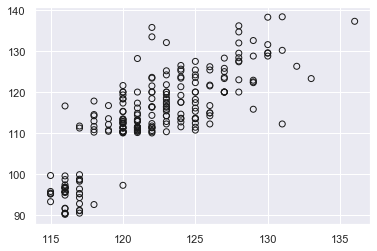

In [71]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

newDB = pd.read_csv('data/台系母.csv')

rg = []
r = 0
for i in range(100):
    rg.append(100+i/10)
print(rg)

new = newDB[-newDB['weight'].isin(rg)]
# newDB = newDB.drop(['Unnamed: 0'],axis = 1, inplace = False)
new.head(100)
plt.scatter(new['L'], new['weight'], edgecolor='k', facecolor='None')
# new.to_csv('data/台系母-.csv',index = False)

In [3]:
# 各体尺相关系数对比
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

df = pd.read_csv('data/18-20.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
序号        4149 non-null int64
品系        4149 non-null object
性别        4149 non-null object
测定日期      4149 non-null object
出生日期      4149 non-null object
weight    4149 non-null float64
L         4149 non-null float64
体高        4149 non-null int64
FG        4149 non-null float64
BG        4149 non-null float64
MG        4149 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 356.7+ KB


[[1.         0.63077034 0.60818768 0.6082896  0.2290006  0.71371881]
 [0.63077034 1.         0.91928338 0.86682811 0.19439384 0.66642872]
 [0.60818768 0.91928338 1.         0.86029989 0.2063886  0.65135507]
 [0.6082896  0.86682811 0.86029989 1.         0.18139187 0.63893724]
 [0.2290006  0.19439384 0.2063886  0.18139187 1.         0.23306389]
 [0.71371881 0.66642872 0.65135507 0.63893724 0.23306389 1.        ]]


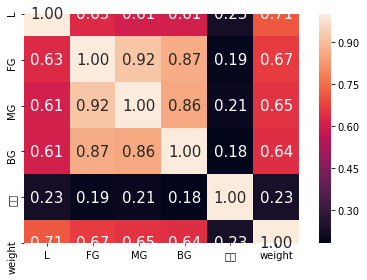

In [4]:
cols = ['L','FG','MG','BG','体高','weight']
cm = np.corrcoef(df[cols].values.T)
print(cm)
hm = sns.heatmap(cm,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.tight_layout()
# plt.figure(figsize=(5,5))
plt.show()

Coefficients: [ 0.00000000e+00  3.95170458e-04 -1.06819838e-10]
intercept: -231.3923270200973
一元线性回归方程为: 	y=-231.3923270200973 + 0.0*x
相关系数(R^2)： 0.8162867526283095；
总体平方和(TSS)： 26467.067488584493；
回归平方和(RSS)： 21604.71647687964；
残差平方和(ESS)： 4862.350916733549；



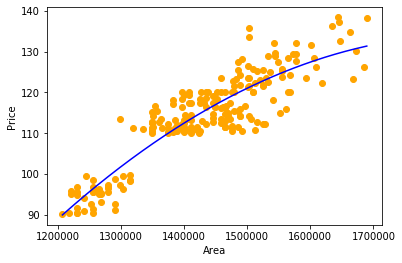

In [2]:
# python -version 3.5+   
import pandas as pd
import matplotlib.pyplot as plt    
import numpy as np    
from sklearn import linear_model   
from sklearn.preprocessing import PolynomialFeatures   

df = pd.read_csv('data/台系母-.csv')

ll = df['L']
g = [ df['FG'],df['BG'], df['MG'] ]

# 读取数据集
datasets_X = ll*g[0]*g[0] #建立datasets_X储存房屋尺寸数据
datasets_Y = df['weight'] #建立datasets_Y储存房屋成交价格数据

def get_lr_stats(x, y, model):
    message0 = '一元线性回归方程为: '+'\ty' + '=' + str(model.intercept_)+' + ' +str(model.coef_[0]) + '*x'
    from scipy import stats
    n = len(x)
    y_prd = model.predict(poly_reg.fit_transform(x))
    Regression = sum((y_prd - np.mean(y))**2) # 回归平方和
    Residual   = sum((y - y_prd)**2)          # 残差平方和
    total = sum((y-np.mean(y))**2) #总体平方和
    R_square   = 1-Residual / total # 相关性系数R^2
    message1 = ('相关系数(R^2)： ' + str(R_square) + '；' + '\n'+ '总体平方和(TSS)： ' +  str(total) + '；' + '\n')
    message2 = ('回归平方和(RSS)： ' + str(Regression) + '；' + '\n残差平方和(ESS)： ' +  str(Residual) + '；' + '\n')
    print(message0 +'\n' +message1 + message2 )
    return R_square




# 数据预处理
length = len(datasets_X)
datasets_X = np.array(datasets_X).reshape([length, 1]) #将datasets_X转化为数组
datasets_Y = np.array(datasets_Y)
minX = min(datasets_X) #以数据datasets_X的最大值和最小值为范围，建立等差数列，方便后续画图
maxX = max(datasets_X)
X = np.arange(minX, maxX).reshape([-1, 1])

# 数据建模
poly_reg = PolynomialFeatures(degree=2) #degree=2表示二次多项式
X_poly = poly_reg.fit_transform(datasets_X) #构造datasets_X二次多项式特征X_poly
lin_reg_2 = linear_model.LinearRegression() #创建线性回归模型
lin_reg_2.fit(X_poly, datasets_Y) #使用线性回归模型学习X_poly和datasets_Y之间的映射关系

# 查看回归系数
print('Coefficients:',lin_reg_2.coef_)
# 查看截距项
print('intercept:',lin_reg_2.intercept_)  

get_lr_stats(datasets_X, datasets_Y, lin_reg_2)

# 数据可视化
plt.scatter(datasets_X, datasets_Y, color='orange')   
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue')   
plt.xlabel('Area')   
plt.ylabel('Price')   
plt.show() 

In [2]:
# python -version 3.5+   
import pandas as pd
import matplotlib.pyplot as plt    
import numpy as np    
from sklearn import linear_model   
from sklearn.preprocessing import PolynomialFeatures   

df = pd.read_csv('data/台系母-.csv')
df = df[]
print(df.corr())

              序号    weight         L        体高        FG        BG        MG
序号      1.000000 -0.001229 -0.110112 -0.116065  0.134730 -0.106853  0.072291
weight -0.001229  1.000000  0.809129  0.757502  0.825362  0.816268  0.787595
L      -0.110112  0.809129  1.000000  0.751588  0.657876  0.672271  0.635296
体高     -0.116065  0.757502  0.751588  1.000000  0.636130  0.642729  0.613164
FG      0.134730  0.825362  0.657876  0.636130  1.000000  0.900243  0.928816
BG     -0.106853  0.816268  0.672271  0.642729  0.900243  1.000000  0.891687
MG      0.072291  0.787595  0.635296  0.613164  0.928816  0.891687  1.000000
